In [2]:
%matplotlib notebook

Para este exemplo, vamos usar o dataset Iris, que pode ser obtido aqui:
https://archive.ics.uci.edu/ml/datasets/Iris

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets

In [4]:
tabela = pd.read_csv("exemplo_7/iris.data",header=None,sep=',')

In [5]:
tabela

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
tabela.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [ ]:
tabela

In [7]:
tabela.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Agora, vamos separar os dados entre as medidas e as espécies.

In [8]:
X = tabela.ix[:,0:4].values
y = tabela.ix[:,4].values

In [ ]:
X

In [19]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [70]:
nomes = list(set(y))

In [66]:
tabela.columns

Index(['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class'], dtype='object')

<IPython.core.display.Javascript object>


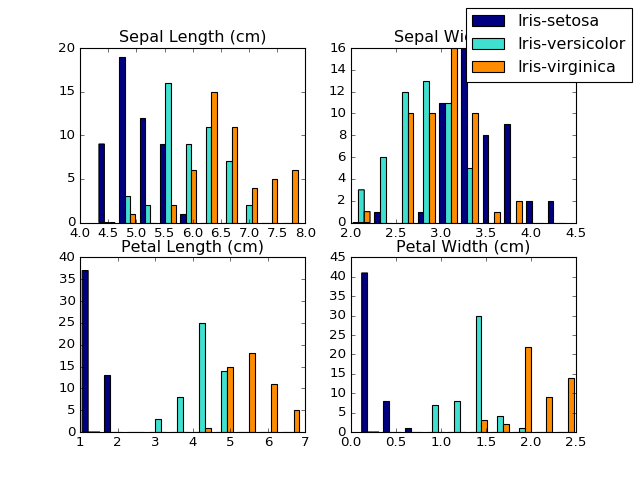

In [88]:
colors = ['navy', 'turquoise', 'darkorange']
fig,ax = plt.subplots(2,2)

#n, bins, patches = P.hist(x, 10, normed=1, histtype='bar',
#                            color=['crimson', 'burlywood', 'chartreuse'],
#                            label=['Crimson', 'Burlywood', 'Chartreuse'])

# Coluna 0
dados_sepal_len = [X[y==nomes[0],0], X[y==nomes[1],0], X[y==nomes[2],0]]

n, bins, patches = ax[0,0].hist(dados_sepal_len,color=colors, label=list(set(y)))
ax[0,0].set_title('Sepal Length (cm)')

# Coluna 1
dados_sepal_wid = [X[y==nomes[0],1], X[y==nomes[1],1], X[y==nomes[2],1]]

ax[0,1].hist(dados_sepal_wid,color=colors, label=list(set(y)))
#ax[0,1].legend()
ax[0,1].set_title('Sepal Width (cm)')

# Coluna 2
dados_sepal_wid = [X[y==nomes[0],2], X[y==nomes[1],2], X[y==nomes[2],2]]

ax[1,0].hist(dados_sepal_wid,color=colors, label=list(set(y)))
#ax[1,0].legend()
ax[1,0].set_title('Petal Length (cm)')

# Coluna 3
dados_sepal_wid = [X[y==nomes[0],3], X[y==nomes[1],3], X[y==nomes[2],3]]

ax[1,1].hist(dados_sepal_wid,color=colors, label=list(set(y)))
#ax[1,1].legend()
ax[1,1].set_title('Petal Width (cm)')

fig.legend(patches, list(set(y)))

Agora, vamos calcular a decomposição em componentes principais:

In [9]:
pca = decomposition.PCA()

In [ ]:
print(pca)

pca agora é uma referência para a função que calcula o PCA de X. Para efetivamente calcularmos os componentes principais, fazemos

In [10]:
pca.fit(X)

PCA(copy=True, n_components=None, whiten=False)

Daqui pra frente, o objeto pca será onde nossas informações estão armazenadas. Para, por exemplo, verificarmos quais são os autovalores (variâncias) do nosso conjunto de dados, podemos fazer

In [ ]:
print(pca.explained_variance_ratio_)

Podemos ver então que o primeiro componente principal explica 92% dos dados.

Para transformarmos os dados para que fiquem alinhados/projetados nestes componentes principais, usamos

In [11]:
Xnew = pca.transform(X)

In [ ]:
print(X)

In [ ]:
print(Xnew)

Agora, queremos visualizar estes dados. Precisamos então selecionar quantos componentes queremos representar. Se quisermos mostrar dois componentes, fazemos

<IPython.core.display.Javascript object>


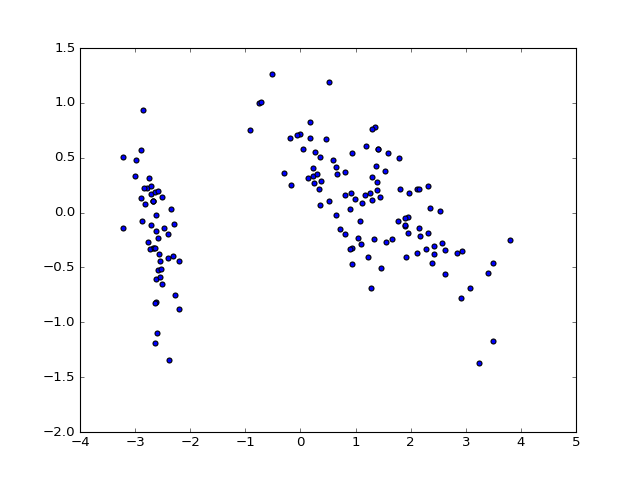

In [89]:
fig,ax = plt.subplots()
plt.cla()
ax.scatter(Xnew[:, 0], Xnew[:, 1], cmap=plt.cm.spectral)
plt.show()

In [33]:
y[0]

'Iris-setosa'

In [90]:
list(set(y))

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [91]:
Xnew[y=='Iris-setosa']

array([[ -2.68420713e+00,  -3.26607315e-01,   2.15118370e-02,
          1.00615724e-03],
       [ -2.71539062e+00,   1.69556848e-01,   2.03521425e-01,
          9.96024240e-02],
       [ -2.88981954e+00,   1.37345610e-01,  -2.47092410e-02,
          1.93045428e-02],
       [ -2.74643720e+00,   3.11124316e-01,  -3.76719753e-02,
         -7.59552741e-02],
       [ -2.72859298e+00,  -3.33924564e-01,  -9.62296998e-02,
         -6.31287327e-02],
       [ -2.27989736e+00,  -7.47782713e-01,  -1.74325619e-01,
         -2.71468037e-02],
       [ -2.82089068e+00,   8.21045110e-02,  -2.64251085e-01,
         -5.00996251e-02],
       [ -2.62648199e+00,  -1.70405349e-01,   1.58015103e-02,
         -4.62817610e-02],
       [ -2.88795857e+00,   5.70798026e-01,  -2.73354061e-02,
         -2.66154143e-02],
       [ -2.67384469e+00,   1.06691704e-01,   1.91533300e-01,
         -5.58909660e-02],
       [ -2.50652679e+00,  -6.51935014e-01,   6.92749958e-02,
         -1.66082478e-02],
       [ -2.61314272e

<IPython.core.display.Javascript object>


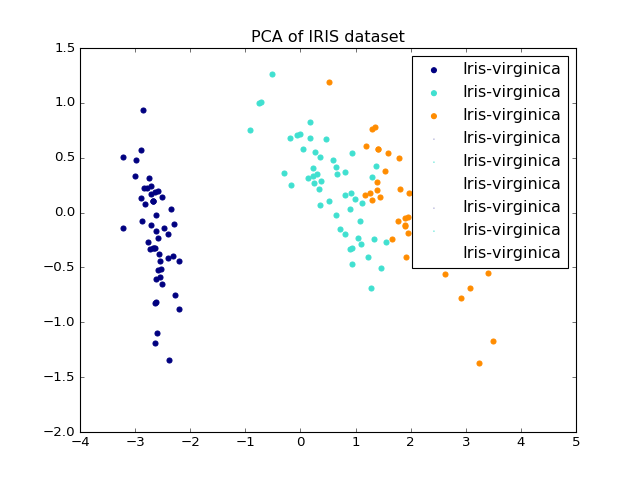

In [123]:
fig2, ax2 = plt.subplots()
for color, i, name in zip(colors, [0, 1, 2], list(set(y))):
    ax2.scatter(Xnew[y == name, 0], Xnew[y == name, 1], color=color, label=names)
ax2.legend(loc='best', shadow=False, scatterpoints=1)
ax2.set_title('PCA of IRIS dataset')

In [124]:
colors

['navy', 'turquoise', 'darkorange']

<IPython.core.display.Javascript object>


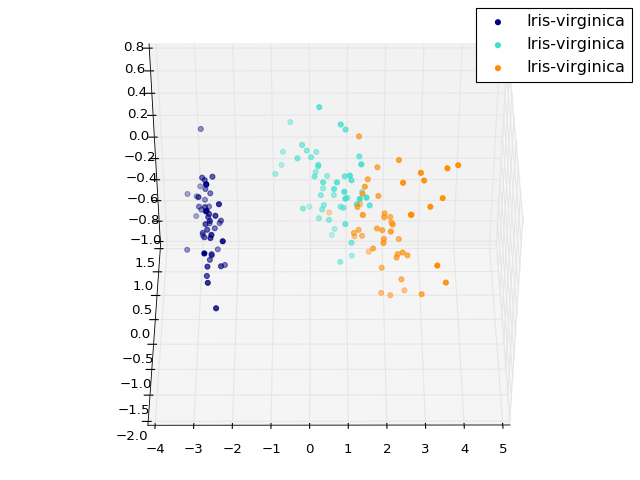

In [137]:
from mpl_toolkits.mplot3d import Axes3D

fig3d = plt.figure(3)
ax = Axes3D(fig3d)
for color, i, name in zip(colors, [0, 1, 2], list(set(y))):
    ax.scatter(Xnew[y == name, 0], Xnew[y == name, 1], Xnew[y==name, 2], color=color, label=names)
ax.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()